In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

import seaborn as sns
from matplotlib.colors import LogNorm

import pandas as pd

## Analyse distribution of CRISPR-Cas systems by taxonomic level

Read in the Master table with the taxonomic lineage

In [4]:
master_table_withTaxon=pd.read_csv('/home/abriner/CRISPR_pipeline/CRISPR_pipeline/crawler_test_run/compare_CRISPRdb_crawler_withfull_taxon_lineage_2017-08-16.csv', index_col=0)

Generate counts for each Type of CRISPR-Cas system

In [5]:
headers = list(master_table_withTaxon.columns.values)
TypeIframe = pd.DataFrame(columns=headers)
Type2frame = pd.DataFrame(columns=headers)
Type3frame = pd.DataFrame(columns=headers)
Type4frame = pd.DataFrame(columns=headers)
Type5frame = pd.DataFrame(columns=headers)
Type6frame = pd.DataFrame(columns=headers)
for index, row in master_table_withTaxon.iterrows():
    type_string = row['System type']
    if type(type_string) is float:
        pass
    else:
        for x in type_string.split('|'):
            if x =='TypeI':
                TypeIframe = TypeIframe.append(row)
            if x =='TypeII':
                Type2frame = Type2frame.append(row)
            if x =='TypeIII':
                Type3frame = Type3frame.append(row)
            if x =='TypeIV':
                Type4frame = Type4frame.append(row)
            if x =='TypeV':
                Type5frame = Type5frame.append(row)
            if x =='TypeVI':
                Type6frame = Type6frame.append(row)

Select the taxonomic level to compare the frequency of CRISPR-Cas systems and compare counts to total genomes searched

In [23]:
taxlevel='Taxonomic ID Phylum'
genus1 = TypeIframe[taxlevel].value_counts().to_frame(name='TypeI')
genus2 = Type2frame[taxlevel].value_counts().to_frame(name='TypeII')
genus3 = Type3frame[taxlevel].value_counts().to_frame(name='TypeIII')
genus4 = Type4frame[taxlevel].value_counts().to_frame(name='TypeIV')
genus5 = Type5frame[taxlevel].value_counts().to_frame(name='TypeV')
genus6 = Type6frame[taxlevel].value_counts().to_frame(name='TypeVI')
genusall = master_table_withTaxon[taxlevel].value_counts().to_frame(name='Total Genomes')
typeframe = [genus2, genus3, genus4, genus5, genus6]
c = genusall.merge(genus1, how='outer', left_index=True, right_index=True)
for x in typeframe:
    c = c.merge(x, how='outer', left_index=True, right_index=True)

#c.drop('undefined', inplace=True)
c.sort_values('Total Genomes', inplace=True,ascending=False)

For aesthetics, select a minimum number of total genomes to be displayed in the figure

In [24]:
c_sub = c[c['Total Genomes']>2]

Generate figure and save as png. This analysis does not calculate the rate of occurence of CRISPR-Cas as genomes with known CRISPRs were selected for this comparison.  

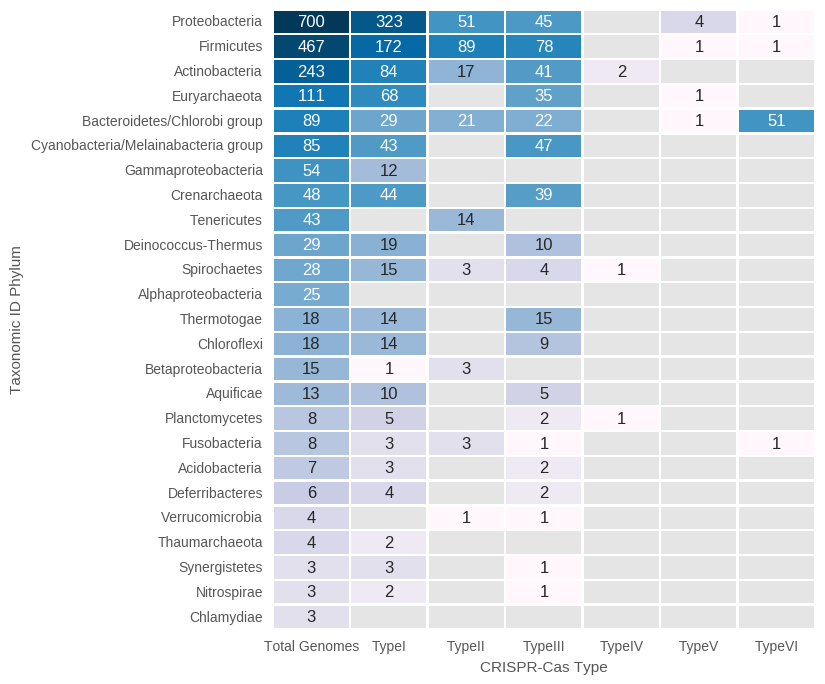

In [26]:
sns.set_context(context="notebook", font_scale=1)
fig, ax = plt.subplots() 
_ = sns.heatmap(c_sub, cbar=False, 
                annot=True, 
                fmt="0,.0f",
                square=False, 
                linewidths=1, 
                ax=ax, 
                norm=LogNorm(vmin=c.min(), vmax=c.max()), 
                cmap='PuBu')
yt=ax.get_yticklabels()
for t in yt:
    t.set_rotation(0)
ax.set_xlabel("CRISPR-Cas Type");
ax.set_ylabel(taxlevel);

fig.set_size_inches([7,8])
#fig.savefig('Class_CRISPR_distr_2017-08-16.png')

## Compare crawler and CRISPRfinder

Compare crawler results to CRISPRfinder: number of RSAs annotated, frequency of cas with RSAs.

In [19]:
#Master table output from crawl
crawler = pd.read_csv('Master_CRISPR_summary_table_2017-08-14.csv', index_col=0)
crawler.head()

,organism,Number of CRISPRs,Total Cas Prots,Total non V-U Prots,Genes present,System type,system subtype,multiple systems,cas1 missing,missing signature prot,missing RSAs
0,NC_000853,7.0,8.0,9.0,cas1|cmr1|cas4|cas8b|c2c9|cas10|cas3,TypeV-U|TypeIII|TypeI,TypeVU-4|TypeIII-B/TypeIII-D|TypeI-B,3.0,NaN,NaN,not all loci have repeats
1,NC_000854,3.0,6.0,10.0,cas1|cas4|cas8a|cas3,TypeI,TypeI-A,1.0,NaN,NaN,not all loci have repeats
2,NC_000868,4.0,3.0,3.0,cas8a|cas3,TypeI,TypeI-A,1.0,missing cas1,NaN,not all loci have repeats
3,NC_000909,14.0,7.0,9.0,cas1|cas4|cas8a|cas10|cas3,TypeIII|TypeI,TypeI-A,2.0,NaN,NaN,not all loci have repeats
4,NC_000913,2.0,5.0,3.0,cas1|c2c8|c2c9|cas8e|cas3,TypeV-U|TypeI,TypeVU-2|TypeVU-4|TypeI-E,2.0,NaN,NaN,not all loci have repeats


In [20]:
#Results scraped from the CRISPRdb website
DBcrispr = pd.read_csv('/home/abriner/CRISPR_df.csv',index_col=0)
DBcrispr.head()

,ScientificName,TaxonId,SequenceCount,SequenceCRISPRCount,RefSeq,GenomeLength,CRISPRCount,CRISPRId,BeginningPosition,EndingPosition,Hypothetical,DRLength,DRConsensus
0,'Nostoc azollae' 0708,551115,3,4,NC_014248,5354700,4,NC_014248_3,2535645,2535721,Yes,26,TTGAGTAGAATAAAAAGGTCTGACAA
1,'Nostoc azollae' 0708,551115,3,4,NC_014248,5354700,4,NC_014248_4,2685437,2685540,No,31,ATTGCAATTCCAACTAATCCCTATTAGGGAT
2,'Nostoc azollae' 0708,551115,3,4,NC_014248,5354700,4,NC_014248_6,3747457,3747637,Yes,24,TTGGGGGGATTTAGTAAATTGAAA
3,'Nostoc azollae' 0708,551115,3,4,NC_014248,5354700,4,NC_014248_7,4551458,4551557,Yes,34,GCTTCCAGAGGCAACCTTTTTACACCTGCTCCTG
4,Acaryochloris marina MBIC11017,329726,10,3,NC_009925,6503724,1,NC_009925_1,4815174,4815426,No,37,CTTTCAACCCCCAACACCCTCAAAAGGACGTTGCGAC


In [21]:
#Generate column with counts of hypothetical and likely RSAs from CRISPRfinder output
header = ['organism', 'Number of CRISPRS - CRISPRfinder', 'Scientific Name', 'TaxonID','Hypothetical CRISPRfinders']
summary_frame = pd.DataFrame(columns=header)
for name, group in DBcrispr.groupby(by='RefSeq'):
    hypo_count = 0
    for index, row in group.iterrows():
        SciName = row['ScientificName']
        TaxID = row['TaxonId']
        hypo = row['Hypothetical']
        if hypo =='Yes':
            hypo_count +=1
    group_res = pd.DataFrame(data=[[name, len(group), SciName, str(TaxID), hypo_count]], columns=header)
    summary_frame = summary_frame.append(group_res)

In [22]:
compare_DBS = summary_frame.merge(crawler, on ='organism')

In [23]:
compare_DBS.head()

,organism,Number of CRISPRS - CRISPRfinder,Scientific Name,TaxonID,Hypothetical CRISPRfinders,Number of CRISPRs,Total Cas Prots,Total non V-U Prots,Genes present,System type,system subtype,multiple systems,cas1 missing,missing signature prot,missing RSAs
0,NC_000853,8.0,Thermotoga maritima MSB8,243274,0.0,7.0,8.0,9.0,cas1|cmr1|cas4|cas8b|c2c9|cas10|cas3,TypeV-U|TypeIII|TypeI,TypeVU-4|TypeIII-B/TypeIII-D|TypeI-B,3.0,NaN,NaN,not all loci have repeats
1,NC_000854,4.0,Aeropyrum pernix K1,272557,1.0,3.0,6.0,10.0,cas1|cas4|cas8a|cas3,TypeI,TypeI-A,1.0,NaN,NaN,not all loci have repeats
2,NC_000868,4.0,Pyrococcus abyssi GE5,272844,0.0,4.0,3.0,3.0,cas8a|cas3,TypeI,TypeI-A,1.0,missing cas1,NaN,not all loci have repeats
3,NC_000907,1.0,Haemophilus influenzae Rd KW20,71421,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,no repeats
4,NC_000909,20.0,Methanocaldococcus jannaschii DSM 2661,243232,0.0,14.0,7.0,9.0,cas1|cas4|cas8a|cas10|cas3,TypeIII|TypeI,TypeI-A,2.0,NaN,NaN,not all loci have repeats


In [9]:
#compare_DBS.to_csv('crawler_test_run/compare_CRISPRdb_crawler_2017-08-15.csv')

In [24]:
compare_DBS = compare_DBS.fillna('')

In [25]:
#Apply logic to determine how crawl compared to CRISPRfinder
for index, row in compare_DBS.iterrows():
    CF_numb = row['Number of CRISPRS - CRISPRfinder']
    hyponum = row['Hypothetical CRISPRfinders']
    crawl = row['Number of CRISPRs']
    syscounts = row['multiple systems']
    CFreal = int(CF_numb) - int(hyponum)
    compare_DBS.loc[index, 'CRISPRfinder likely'] = CFreal
    #print index, CF_numb, type(CF_numb), hyponum, type(hyponum),crawl, type(crawl),syscounts, type(syscounts), type(CFreal)
    if type(crawl) is not int:
        if crawl is '':
            crawl = 0.0
        else:
            crawl = int(crawl)
    if type(syscounts) is not int:
        if syscounts is '':
            syscounts = 0.0
        else:
            syscounts = int(syscounts)
    #print index, CF_numb, type(CF_numb), hyponum, type(hyponum),crawl, type(crawl),syscounts, type(syscounts), type(CFreal)
    if crawl == CFreal:
        compare = ''
    elif crawl > CFreal:
        compare = 'crawler has more repeats'
    elif crawl < CFreal:
        compare = 'CRISPRfinder has more repeats'
    compare_DBS.loc[index, 'repeat detection'] = compare
    if crawl == syscounts:
        casRSA = 'equal occurence of RSA and cas'
    elif crawl < int(syscounts):
        casRSA = 'more cas than RSA'
    elif crawl > int(syscounts):
        casRSA = 'more RSA than cas'
    compare_DBS.loc[index, 'cas detection'] = casRSA

In [26]:
compare_DBS.head()

,organism,Number of CRISPRS - CRISPRfinder,Scientific Name,TaxonID,Hypothetical CRISPRfinders,Number of CRISPRs,Total Cas Prots,Total non V-U Prots,Genes present,System type,system subtype,multiple systems,cas1 missing,missing signature prot,missing RSAs,CRISPRfinder likely,repeat detection,cas detection
0,NC_000853,8.0,Thermotoga maritima MSB8,243274,0.0,7.0,8.0,9.0,cas1|cmr1|cas4|cas8b|c2c9|cas10|cas3,TypeV-U|TypeIII|TypeI,TypeVU-4|TypeIII-B/TypeIII-D|TypeI-B,3,,,not all loci have repeats,8.0,CRISPRfinder has more repeats,more RSA than cas
1,NC_000854,4.0,Aeropyrum pernix K1,272557,1.0,3.0,6.0,10.0,cas1|cas4|cas8a|cas3,TypeI,TypeI-A,1,,,not all loci have repeats,3.0,,more RSA than cas
2,NC_000868,4.0,Pyrococcus abyssi GE5,272844,0.0,4.0,3.0,3.0,cas8a|cas3,TypeI,TypeI-A,1,missing cas1,,not all loci have repeats,4.0,,more RSA than cas
3,NC_000907,1.0,Haemophilus influenzae Rd KW20,71421,1.0,0.0,0.0,0.0,,,,,,,no repeats,0.0,,equal occurence of RSA and cas
4,NC_000909,20.0,Methanocaldococcus jannaschii DSM 2661,243232,0.0,14.0,7.0,9.0,cas1|cas4|cas8a|cas10|cas3,TypeIII|TypeI,TypeI-A,2,,,not all loci have repeats,20.0,CRISPRfinder has more repeats,more RSA than cas


In [27]:
#compare_DBS.to_csv('compare_CRISPRdb_crawler_analysis_2017-08-15.csv')

In [29]:
#How crawler compared to CRISPRfinder by number of genome counts
compare_DBS['repeat detection'].value_counts()

                                 1531
CRISPRfinder has more repeats     388
crawler has more repeats          133
Name: repeat detection, dtype: int64

In [30]:
compare_DBS['cas detection'].value_counts()

equal occurence of RSA and cas    1073
more RSA than cas                  737
more cas than RSA                  242
Name: cas detection, dtype: int64

In [31]:
compare_DBS['cas1 missing'].value_counts()

                1843
missing cas1     209
Name: cas1 missing, dtype: int64

In [32]:
compare_DBS['missing signature prot'].value_counts()

                             2015
missing signature protein      37
Name: missing signature prot, dtype: int64

In [33]:
compare_DBS['missing RSAs'].value_counts()

not all loci have repeats    1292
no repeats                    760
Name: missing RSAs, dtype: int64

In [34]:
#Calc total number of arrays and proteins found by each program
compare_DBS.sum()

Number of CRISPRS - CRISPRfinder    7384.0
Hypothetical CRISPRfinders          3324.0
Number of CRISPRs                   3533.0
Total Cas Prots                     7717.0
Total non V-U Prots                 7641.0
CRISPRfinder likely                 4060.0
dtype: float64

In [35]:
#Count number of RSAs in each genotype (type of CRISPR-Cas system(s) present in a genome)
compare_DBS.pivot_table(index=['System type'], values=['CRISPRfinder likely','Number of CRISPRs','multiple systems'], aggfunc='sum')

,CRISPRfinder likely,Number of CRISPRs
System type,,
,371.0,205.0
TypeI,897.0,812.0
TypeII,165.0,137.0
TypeIII,185.0,137.0
TypeIII|TypeI,944.0,887.0
TypeIII|TypeII,44.0,26.0
TypeIII|TypeI|TypeII,34.0,32.0
TypeI|TypeII,108.0,100.0
TypeI|TypeIV,3.0,4.0
